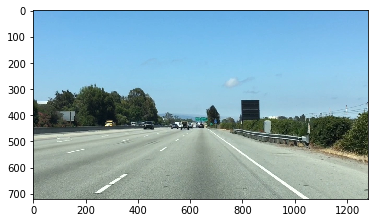

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('test.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

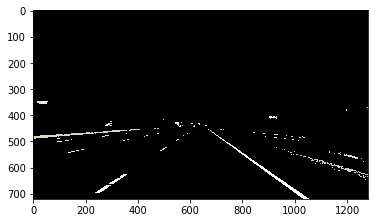

In [75]:
image_2 = image.copy()

ysize = image.shape[0]
xsize = image.shape[1]

red_threshold, green_threshold, blue_threshold = 200, 200, 200
threshold = [red_threshold, green_threshold, blue_threshold]
color_threshold = ((image[:, :, 0] < threshold[0]) | (image[:, :, 1] < threshold[1]) | (image[:, :, 1] < threshold[1]))
image_2[color_threshold] = [0, 0, 0]

plt.imshow(image_2)
plt.show()

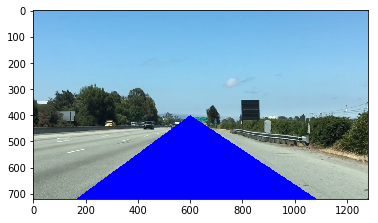

In [76]:
image_3 = image.copy()

left_bottom, apex, right_bottom = [150, 730], [600, 400], [1100, 730]

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)

XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

region_select = ((YY > (XX*fit_left[0] + fit_left[1])) & (YY < (XX*fit_bottom[0] + fit_bottom[1])) & (YY > (XX*fit_right[0] + fit_right[1])))

image_3[region_select] = [0, 0, 255]

plt.imshow(image_3)
plt.show()

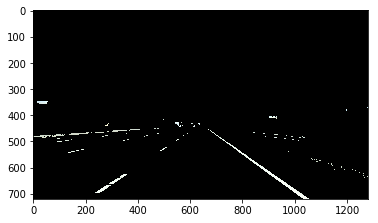

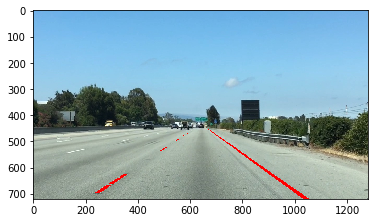

In [77]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Read in the image
image = cv2.imread('test.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Grab the x and y sizes and make two copies of the image
# With one copy we'll extract only the pixels that meet our selection,
# then we'll paint those pixels red in the original image to see our selection 
# overlaid on the original.

ysize = image.shape[0]
xsize = image.shape[1]

color_select= np.copy(image)
line_image = np.copy(image)

# Define our color criteria
red_threshold, green_threshold, blue_threshold = 200, 200, 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define a triangular region of interest
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing

#Defining the 3 corners of Traingle
left_bottom, apex, right_bottom = [155, 730], [700, 400], [1080, 730]

#Degining the three lines(line of the form   ax + by + c = 0) made by the three above points
#                                            |    | 
#                |------------:)-------------|    |
#                | |---------:)-------------------|                               
#                | |
# Getting the   (a, b) of the left line
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)

#Getting the (a, b) of the right line
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)

#Getting the (a, b) of the bottom line
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])


# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))


# Mask color selection
color_select[color_thresholds] = [0,0,0]


# Find where image is both colored right and in the region
line_image[~color_thresholds & region_thresholds] = [255,0,0]


# Display our two output images
plt.imshow(color_select)
plt.show()

plt.imshow(line_image)
plt.show()